Serie de Fourier:
sin(x)   2⋅cos(2⋅x)   2⋅cos(4⋅x)   2⋅cos(6⋅x)   2⋅cos(8⋅x)   2⋅cos(10⋅x)   1
────── - ────────── - ────────── - ────────── - ────────── - ─────────── + ─
  2         3⋅π          15⋅π         35⋅π         63⋅π          99⋅π      π


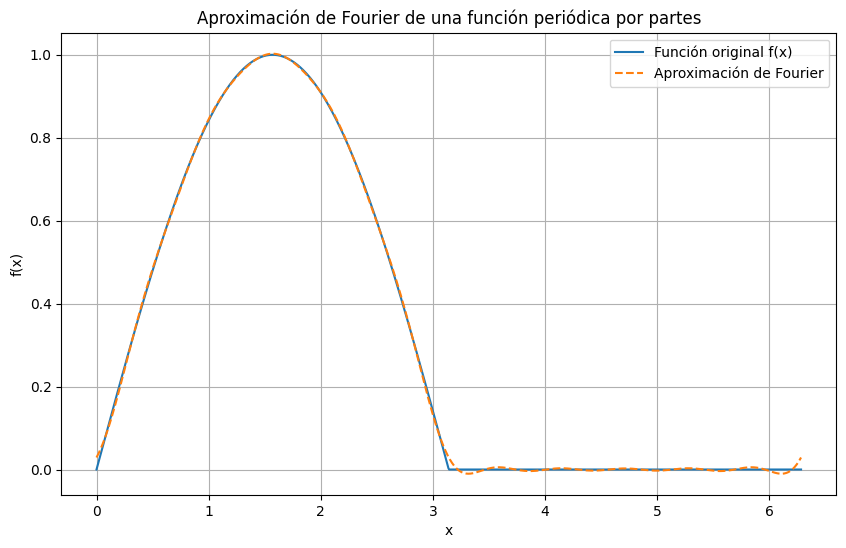

Serie de Fourier en LaTeX:
\frac{\sin{\left(x \right)}}{2} - \frac{2 \cos{\left(2 x \right)}}{3 \pi} - \frac{2 \cos{\left(4 x \right)}}{15 \pi} - \frac{2 \cos{\left(6 x \right)}}{35 \pi} - \frac{2 \cos{\left(8 x \right)}}{63 \pi} - \frac{2 \cos{\left(10 x \right)}}{99 \pi} + \frac{1}{\pi}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def fourier_series_coefficients_symbolic(f_expr, L, N):
    x = sp.Symbol('x')
    a0 = (1 / (2 * L)) * sp.integrate(f_expr, (x, 0, 2 * L))
    an = []
    bn = []

    for n in range(1, N + 1):
        an_n = (1 / L) * sp.integrate(f_expr * sp.cos(n * sp.pi * x / L), (x, 0, 2 * L))
        bn_n = (1 / L) * sp.integrate(f_expr * sp.sin(n * sp.pi * x / L), (x, 0, 2 * L))
        an.append(an_n)
        bn.append(bn_n)

    return a0, an, bn

def fourier_series_expr(a0, an, bn, L, x):
    series = a0
    for n in range(1, len(an) + 1):
        series += an[n-1] * sp.cos(n * sp.pi * x / L) + bn[n-1] * sp.sin(n * sp.pi * x / L)
    return series

# Definir la función periódica f(x) por partes en sympy
x = sp.Symbol('x')
f_expr = sp.Piecewise((sp.sin(x), (x >= 0) & (x < sp.pi)), (0, (x >= sp.pi) & (x < 2 * sp.pi)))

# Parámetros
L = sp.pi  # Semi-periodo
N = 10  # Número de términos en la serie de Fourier

# Calcular los coeficientes de Fourier simbólicamente
a0, an, bn = fourier_series_coefficients_symbolic(f_expr, L, N)

# Calcular la serie de Fourier simbólicamente
f_fourier = fourier_series_expr(a0, an, bn, L, x)

# Mostrar la serie de Fourier analítica
print("Serie de Fourier:")
sp.pprint(f_fourier, use_unicode=True)

# Convertir la serie de Fourier simbólica a función numérica para graficar
f_fourier_func = sp.lambdify(x, f_fourier, modules=['numpy'])

# Crear el eje x para graficar
x_vals = np.linspace(0, 2 * np.pi, 1000)

# Definir la función periódica original en numpy para la evaluación numérica
def f_np(x):
    x = np.mod(x, 2 * np.pi)
    return np.where((x >= 0) & (x < np.pi), np.sin(x), 0)

# Calcular la aproximación de Fourier
f_approx = f_fourier_func(x_vals)

# Graficar la función original y su aproximación de Fourier
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_np(x_vals), label='Función original f(x)')
plt.plot(x_vals, f_approx, label='Aproximación de Fourier', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Aproximación de Fourier de una función periódica por partes')
plt.grid(True)
plt.show()
# Mostrar la serie de Fourier analítica en LaTeX
print("Serie de Fourier en LaTeX:")
print(sp.latex(f_fourier, mode='plain'))


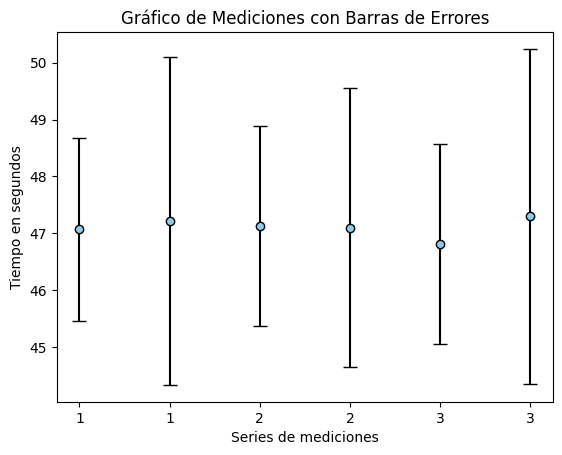

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
mediciones = [47.07, 47.22, 47.13, 47.10, 46.81, 47.3]  # Seis mediciones
errores = [1.60, 2.88, 1.76, 2.45, 1.76, 2.94]  # Seis errores
labels = ['1', '1', '2', '2', '3', '3']  # Etiquetas repetidas para los pares de datos
x = np.arange(6)  # Ajuste del rango para solo 3 pares de mediciones

# Crear el gráfico de dispersión con barras de errores
fig, ax = plt.subplots()

# Graficar los puntos con las etiquetas 'A', 'B' y 'C' en la misma posición x
ax.errorbar(x, mediciones, yerr=errores, fmt='o', capsize=5, color='skyblue', ecolor='black', markeredgecolor='black')

# Añadir etiquetas y título
ax.set_xticks(x)
ax.set_xticklabels(labels[:6])  # Usar solo las primeras 3 etiquetas
ax.set_xlabel('Series de mediciones')
ax.set_ylabel('Tiempo en segundos')
ax.set_title('Gráfico de Mediciones con Barras de Errores')

# Mostrar el gráfico
plt.show()







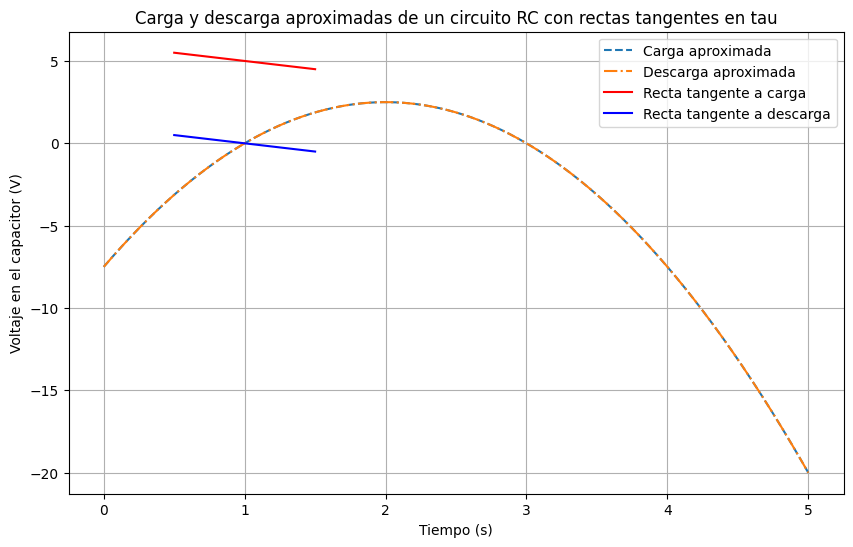

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir valores de los parámetros del circuito
R = 1.0  # Resistencia en ohmios
C = 1.0  # Capacitancia en faradios
V_s = 5.0  # Voltaje de la fuente en voltios
tau = R * C  # Constante de tiempo

# Funciones de carga y descarga exactas
def carga_exacta(t):
    return V_s * (1 - np.exp(-t / (R * C)))

def descarga_exacta(t):
    return V_s * np.exp(-t / (R * C))

# Funciones de carga y descarga aproximadas mediante la serie de Taylor
def carga_aprox(t):
    return V_s * ((t - tau) / (R * C) - 0.5 * ((t - tau) / (R * C))**2)

def descarga_aprox(t):
    return V_s * ((t - tau) / (R * C) - 0.5 * ((t - tau) / (R * C))**2)

# Calcular la pendiente en el punto tau
m_carga = -1 / (R * C)
m_descarga = -1 / (R * C)

# Calcular las rectas tangentes
carga_tangente = m_carga * (np.linspace(tau - 0.5, tau + 0.5, 100) - tau) + V_s
descarga_tangente = m_descarga * (np.linspace(tau - 0.5, tau + 0.5, 100) - tau) + 0

# Graficar las funciones de carga y descarga
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 5 * tau, 1000), carga_aprox(np.linspace(0, 5 * tau, 1000)), label='Carga aproximada', linestyle='--')
plt.plot(np.linspace(0, 5 * tau, 1000), descarga_aprox(np.linspace(0, 5 * tau, 1000)), label='Descarga aproximada', linestyle='-.')
plt.plot(np.linspace(tau - 0.5, tau + 0.5, 100), carga_tangente, label='Recta tangente a carga', color='red')
plt.plot(np.linspace(tau - 0.5, tau + 0.5, 100), descarga_tangente, label='Recta tangente a descarga', color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje en el capacitor (V)')
plt.title('Carga y descarga aproximadas de un circuito RC con rectas tangentes en tau')
plt.legend()
plt.grid(True)
plt.show()


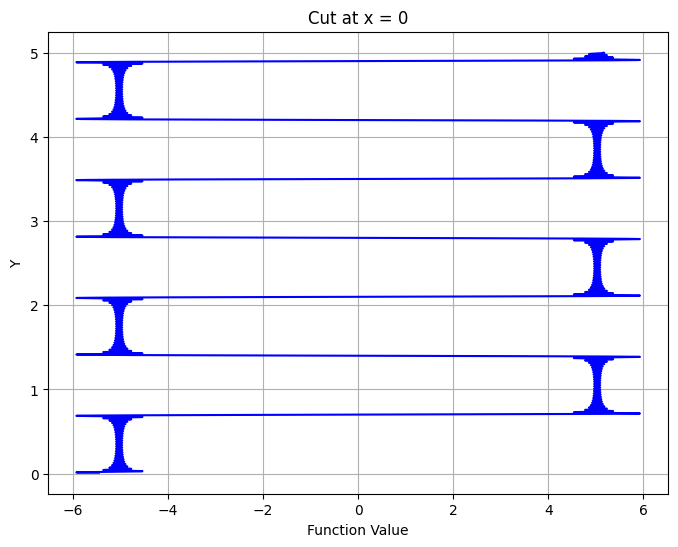

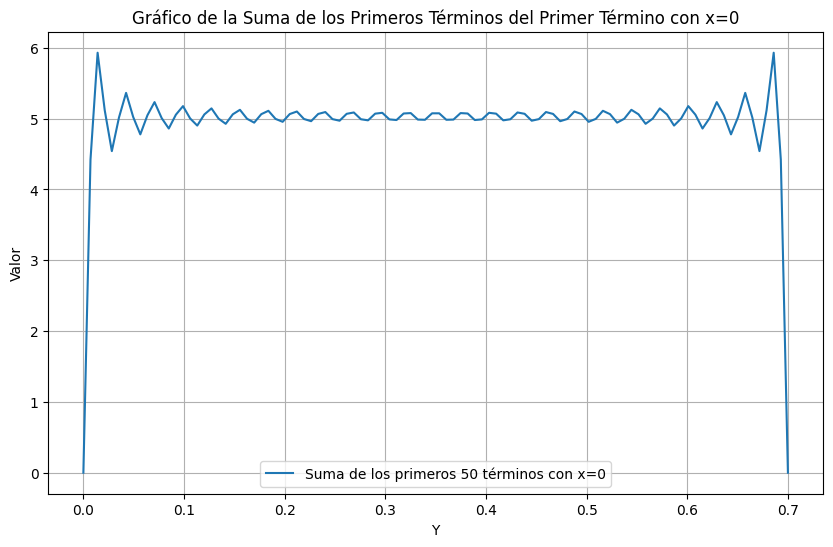

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir las variables simbólicas
x, y, a, b, alpha1, alpha2, alpha5, beta1, beta2, beta5, V4 = sp.symbols('x y a b alpha1 alpha2 alpha5 beta1 beta2 beta5 V4')

# Define the function
def first_term_sum(x, y, a, b, alpha1, alpha2, alpha5, beta1, beta2, beta5, V4, num_terms):
    pi = sp.pi
    result = 0
    for n in range(1, num_terms + 1):
        lambda_1 = - n * pi / b

        parte_1 = (sp.sin(lambda_1 * y) * sp.sinh(lambda_1 * (x - a))) / sp.sinh(lambda_1 * a)

        termino_1 = ((-2 * V4 / pi) * (((-1) ** n )- 1) / n) * parte_1

        result += termino_1

    return result

# Valores específicos para las variables
a_val = 1.5
b_val = 0.7
V4_val = 5.03
num_terms = 50  # Número de términos en la sumatoria

# Definir la función sumatoria con x=0
first_term_sum_func = first_term_sum(0, y, a_val, b_val, 0, 0, 0, 0, 0, 0, V4_val, num_terms)

# Convertir la función simbólica en una función numérica
first_term_sum_numeric = sp.lambdify(y, first_term_sum_func, 'numpy')

# Rango de valores para y
y_vals = np.linspace(0, b_val, 100)
z_vals = first_term_sum_numeric(y_vals)

# Graficar la suma de todos los términos del primer término con x=0
plt.figure(figsize=(10, 6))
plt.plot(y_vals, z_vals, label=f'Suma de los primeros {num_terms} términos con x=0')
plt.xlabel('Y')
plt.ylabel('Valor')
plt.title('Gráfico de la Suma de los Primeros Términos del Primer Término con x=0')
plt.legend()
plt.grid(True)
plt.show()






Estimación de V0 (Carga): 5.820800099895961 V
Estimación de tau (Carga): 2.2547097886499246 s
Estimación de VC0 (Descarga): 4.99095372256278 V
Estimación de tau (Descarga): 1.9810894172897136 s


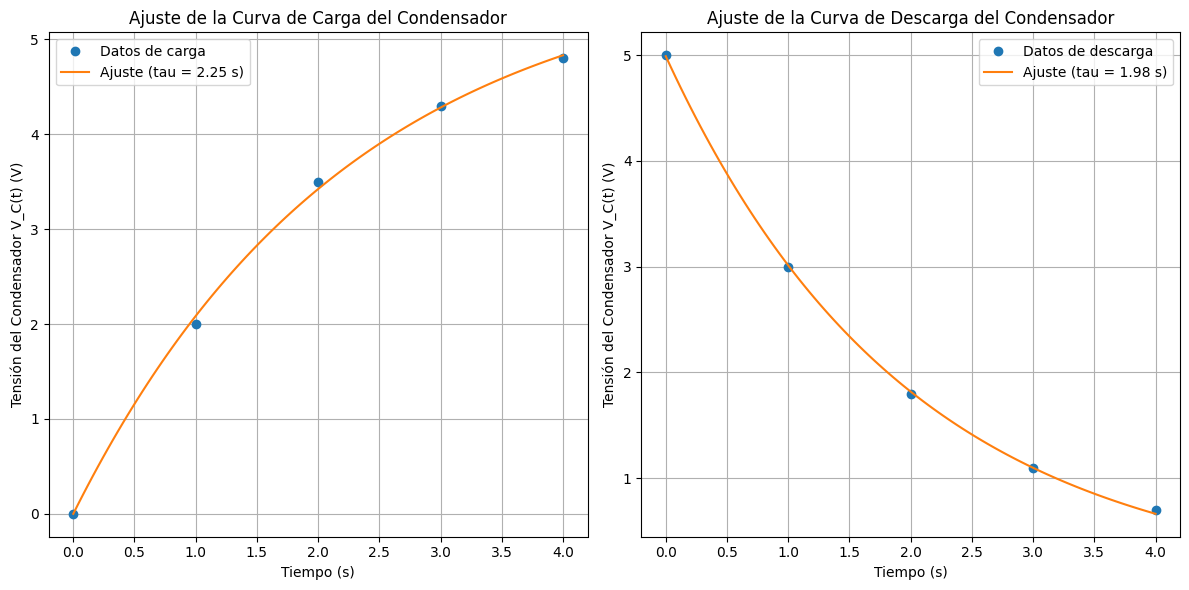

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos de ejemplo para carga y descarga
t_data_charge = np.array([0, 1, 2, 3, 4])
VC_data_charge = np.array([0.0, 2.0, 3.5, 4.3, 4.8])

t_data_discharge = np.array([0, 1, 2, 3, 4])
VC_data_discharge = np.array([5.0, 3.0, 1.8, 1.1, 0.7])

# Definimos las funciones de carga y descarga
def charge_curve(t, V0, tau):
    return V0 * (1 - np.exp(-t / tau))

def discharge_curve(t, VC0, tau):
    return VC0 * np.exp(-t / tau)

# Ajuste de las curvas
params_charge, covariance_charge = curve_fit(charge_curve, t_data_charge, VC_data_charge, p0=[5, 1])
params_discharge, covariance_discharge = curve_fit(discharge_curve, t_data_discharge, VC_data_discharge, p0=[5, 1])

V0_est, tau_est_charge = params_charge
VC0_est, tau_est_discharge = params_discharge

# Mostrar los resultados
print(f"Estimación de V0 (Carga): {V0_est} V")
print(f"Estimación de tau (Carga): {tau_est_charge} s")
print(f"Estimación de VC0 (Descarga): {VC0_est} V")
print(f"Estimación de tau (Descarga): {tau_est_discharge} s")

# Gráfica de los datos y el ajuste
t_fit = np.linspace(0, 4, 100)
VC_fit_charge = charge_curve(t_fit, V0_est, tau_est_charge)
VC_fit_discharge = discharge_curve(t_fit, VC0_est, tau_est_discharge)

plt.figure(figsize=(12, 6))

# Gráfica de carga
plt.subplot(1, 2, 1)
plt.plot(t_data_charge, VC_data_charge, 'o', label='Datos de carga')
plt.plot(t_fit, VC_fit_charge, '-', label=f'Ajuste (tau = {tau_est_charge:.2f} s)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tensión del Condensador V_C(t) (V)')
plt.legend()
plt.grid(True)
plt.title('Ajuste de la Curva de Carga del Condensador')

# Gráfica de descarga
plt.subplot(1, 2, 2)
plt.plot(t_data_discharge, VC_data_discharge, 'o', label='Datos de descarga')
plt.plot(t_fit, VC_fit_discharge, '-', label=f'Ajuste (tau = {tau_est_discharge:.2f} s)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tensión del Condensador V_C(t) (V)')
plt.legend()
plt.grid(True)
plt.title('Ajuste de la Curva de Descarga del Condensador')

plt.tight_layout()
plt.show()




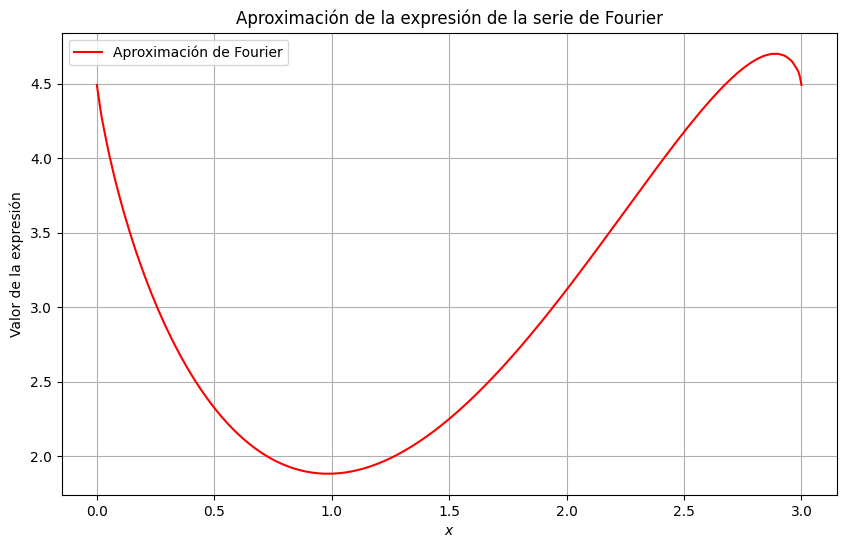

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función para evaluar la expresión numéricamente
def evaluate_expression(x_val, n_terms):
    result = 3
    for i in range(1, n_terms + 1):
        result += (9 / ((i * np.pi) ** 2)) * (np.cos((2 * i * np.pi * x_val) / 3) - np.sin((2 * i * np.pi * x_val) / 3))
    return result

# Valores de x para evaluar la función
x_values = np.linspace(0, 3, 1000)

# Número de términos en la serie de Fourier
num_terms = 100  # Cambia este valor según la cantidad de términos que desees incluir en la aproximación

# Calcular la expresión para cada valor de x
approximation = [evaluate_expression(x, num_terms) for x in x_values]

# Graficar la expresión
plt.figure(figsize=(10, 6))
plt.plot(x_values, approximation, label='Aproximación de Fourier', color='red')
plt.title('Aproximación de la expresión de la serie de Fourier')
plt.xlabel('$x$')
plt.ylabel('Valor de la expresión')
plt.legend()
plt.grid(True)
plt.show()





a0:
6.123233995736765e-17


an:
-6.0 
─────
   2 
  π  
1.5
───
  2
 π 
-0.666666666666667 
───────────────────
          2        
         π         
0.375
─────
   2 
  π  
-0.24 
──────
   2  
  π   


bn:
0
0
0
0
0


In [ ]:
import sympy as sp

def propagacion_errores(expr, vars, deltas):
    """
    Calcula la propagación de errores para una expresión dada.

    Args:
        expr (sympy.Expr): La expresión para la cual se calculará la propagación de errores.
        vars (list): La lista de variables involucradas en la expresión.
        deltas (list): La lista de incertidumbres asociadas a cada variable.

    Returns:
        sympy.Expr: La expresión para la propagación de errores.
    """
    # Calcular las derivadas parciales de la expresión con respecto a cada variable
    derivadas = [sp.diff(expr, var) for var in vars]

    # Calcular la propagación de errores utilizando la fórmula de propagación de errores
    error_cuadratico = sum([(derivada * delta)**2 for derivada, delta in zip(derivadas, deltas)])
    error_total = sp.sqrt(error_cuadratico)

    return error_total

# Definir las variables y sus incertidumbres
x, y = sp.symbols('x y')
delta_x, delta_y = sp.symbols('delta_x delta_y')

# Definir la expresión para la cual se calculará la propagación de errores
expr = x**2 * y**3

# Calcular la propagación de errores
propagacion_errores_expr = propagacion_errores(expr, [x, y], [delta_x, delta_y])

# Mostrar la expresión para la propagación de errores
print("Expresión para la propagación de errores:")
sp.pprint(propagacion_errores_expr, use_unicode=True)

# Mostrar la expresión para la propagación de errores en LaTeX
print("\nExpresión para la propagación de errores en LaTeX:")
print(sp.latex(propagacion_errores_expr, mode='plain'))


Expresión para la propagación de errores:
   ____________________________
  ╱     2  2  6        2  4  4 
╲╱  4⋅δₓ ⋅x ⋅y  + 9⋅δ_y ⋅x ⋅y  

Expresión para la propagación de errores en LaTeX:
\sqrt{4 \delta_{x}^{2} x^{2} y^{6} + 9 \delta_{y}^{2} x^{4} y^{4}}


In [ ]:
import sympy as sp

# Definir las variables simbólicas
x, y, z = sp.symbols('x y z')

# Definir la función en múltiples variables
f = x**2 + y**3 + z**2

# Listas para almacenar resultados
derivadas = []
integrales = []
variables_list = [[x], [y], [z], [x, y], [x, z], [y, z], [x, y, z]]

# Iterar sobre todas las combinaciones posibles de derivadas e integrales
for variables in variables_list:
    # Derivar la función respecto a las variables especificadas
    df = f
    for var in variables:
        df = sp.diff(df, var)
    derivadas.append((df, variables))

    # Integrar la función respecto a las variables especificadas
    int_f = f
    for var in variables:
        int_f = sp.integrate(int_f, var)
    integrales.append((int_f, variables))

# Imprimir los resultados
print("Derivadas parciales:")
for df, vars in derivadas:
    vars_str = ','.join([str(var) for var in vars])
    print(f"d({f})/d({vars_str}) =")
    sp.pprint(df)
    print("Formato en Latex")
    print(sp.latex(df, mode='plain'))
    print("------------------------------------------------------------------")
    print()

print("\nIntegrales:")
for int_f, vars in integrales:
    vars_str = ','.join([str(var) for var in vars])
    print(f"∫({f}) d({vars_str}) =")
    sp.pprint(int_f)
    print("Formato en Latex")
    print(sp.latex(int_f, mode='plain'))
    print("------------------------------------------------------------------")
    print()







Derivadas parciales:
d(x**2 + y**3 + z**2)/d(x) =
2⋅x
Formato en Latex
2 x
------------------------------------------------------------------

d(x**2 + y**3 + z**2)/d(y) =
   2
3⋅y 
Formato en Latex
3 y^{2}
------------------------------------------------------------------

d(x**2 + y**3 + z**2)/d(z) =
2⋅z
Formato en Latex
2 z
------------------------------------------------------------------

d(x**2 + y**3 + z**2)/d(x,y) =
0
Formato en Latex
0
------------------------------------------------------------------

d(x**2 + y**3 + z**2)/d(x,z) =
0
Formato en Latex
0
------------------------------------------------------------------

d(x**2 + y**3 + z**2)/d(y,z) =
0
Formato en Latex
0
------------------------------------------------------------------

d(x**2 + y**3 + z**2)/d(x,y,z) =
0
Formato en Latex
0
------------------------------------------------------------------


Integrales:
∫(x**2 + y**3 + z**2) d(x) =
 3              
x      ⎛ 3    2⎞
── + x⋅⎝y  + z ⎠
3               
Formato en 

In [1]:
python --version


NameError: name 'python' is not defined